In [2]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

#from library.sb_utils import save_file


In [3]:
# the supplied CSV data file is the raw_data directory
data = pd.read_csv('E:/Spring 2021/Springboard/Capstone 1/ai4i2020.csv')

In [4]:
#Step 1: Clean the data
# The data is already cleaned
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
#Non_Failure_Data = data[data.Machine_failure != 0]

In [7]:
data2 = data.rename(columns={'Product ID': 'Product_ID', 
                           'Air temperature [K]': 'Air_temperature_K',
                           'Process temperature [K]':'Process_temperature_K',
                           'Rotational speed [rpm]':'Rotational_speed_rpm',
                           'Torque [Nm]':'Torque_Nm',
                           'Tool wear [min]':'Tool_wear_min',
                           'Machine failure':'Machine_failure'})

print(data2)

        UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
0         1     M14860    M              298.1                  308.6   
1         2     L47181    L              298.2                  308.7   
2         3     L47182    L              298.1                  308.5   
3         4     L47183    L              298.2                  308.6   
4         5     L47184    L              298.2                  308.7   
...     ...        ...  ...                ...                    ...   
9995   9996     M24855    M              298.8                  308.4   
9996   9997     H39410    H              298.9                  308.4   
9997   9998     M24857    M              299.0                  308.6   
9998   9999     H39412    H              299.0                  308.7   
9999  10000     M24859    M              299.0                  308.7   

      Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Machine_failure  TWF  \
0                     1551       42.8        

In [8]:
#Step 2 : Restructure the Data Into Single Form

Failure_Type = []

# print(len(data2))
# print(data2["TWF"][0])

for i in range(len(data2)):
    if data2["TWF"][i] == 1:
        Failure_Type.append("TWF")
    elif data2["HDF"][i] == 1:
        Failure_Type.append("HDF")
    elif data2["PWF"][i] == 1:
        Failure_Type.append("PWF")
    elif data2["OSF"][i] == 1:
        Failure_Type.append("OSF")
    elif data2["RNF"][i] == 1:
        Failure_Type.append("RNF")
    else:
        Failure_Type.append("No")
        
# print(Failure_Type)

data2["Failure_Type"] = Failure_Type

# print(data2)

data2.to_csv("Project_File_Edit_1.csv")


In [9]:
df1= data.set_index('Machine failure').groupby('Machine failure').mean()
print(df1)
#type_data= df1.Type

                         UDI  Air temperature [K]  Process temperature [K]  \
Machine failure                                                              
0                5012.878791           299.973999               309.995570   
1                4647.722714           300.886431               310.290265   

                 Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Machine failure                                                         
0                           1540.260014    39.629655       106.693717   
1                           1496.486726    50.168142       143.781711   

                      TWF       HDF       PWF       OSF       RNF  
Machine failure                                                    
0                0.000000  0.000000  0.000000  0.000000  0.001863  
1                0.135693  0.339233  0.280236  0.289086  0.002950  


In [10]:
df2= data.set_index('TWF').groupby('TWF').mean()
print(df2)
#type_data= df1.Type

             UDI  Air temperature [K]  Process temperature [K]  \
TWF                                                              
0    4998.703536           300.003576               310.004822   
1    5389.239130           300.297826               310.165217   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
TWF                                                                          
0               1538.649488    39.996845       107.449970         0.029435   
1               1566.173913    37.836957       216.369565         1.000000   

          HDF       PWF       OSF       RNF  
TWF                                          
0    0.011553  0.009443  0.009544  0.001808  
1    0.000000  0.021739  0.065217  0.021739  


In [11]:
df3= data.set_index('HDF').groupby('HDF').mean()
print(df3)

             UDI  Air temperature [K]  Process temperature [K]  \
HDF                                                              
0    5007.416894           299.975195               309.996449   
1    4405.947826           302.560870               310.788696   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
HDF                                                                          
0               1541.120486    39.833576       107.959838         0.022661   
1               1337.260870    53.166957       107.191304         1.000000   

          TWF       PWF       OSF       RNF  
HDF                                          
0    0.004654  0.009307  0.009307  0.001922  
1    0.000000  0.026087  0.052174  0.000000  


In [12]:
#Create a database of only 1s
#Create a database of only 0s
#When Type is H
##When HDF is 1 , 
#####Mean : UDI, Air Temp, Process Temp, Rotational Speed and Torque
#####Min : UDI, Air Temp, Process Temp, Rotational Speed and Torque
#####Max : UDI, Air Temp, Process Temp, Rotational Speed and Torque
#####Distribution, Skew : UDI, Air Temp, Process Temp, Rotational Speed and Torque
#####Box Plot : UDI, Air Temp, Process Temp, Rotational Speed and Torque
#####CDF : UDI, Air Temp, Process Temp, Rotational Speed and Torque

#Repeat for 

#Plane : temp monitoring unit issue with airplane. Temp of brakes

#Similary do for 

In [13]:
#Filter Data for Type H product
df_Type_H= data2[data2.Type == "H"]
df_Type_H


,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Failure_Type
10,11,H29424,H,298.4,308.9,1782,23.9,24,0,0,0,0,0,0,No
11,12,H29425,H,298.6,309.1,1423,44.3,29,0,0,0,0,0,0,No
18,19,H29432,H,298.8,309.2,1306,54.5,50,0,0,0,0,0,0,No
20,21,H29434,H,298.9,309.3,1375,42.7,58,0,0,0,0,0,0,No
27,28,H29441,H,299.1,309.4,1811,24.6,77,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,H39392,H,298.6,308.3,1377,52.1,181,0,0,0,0,0,0,No
9984,9985,H39398,H,298.7,308.4,1432,42.8,197,0,0,0,0,0,0,No
9985,9986,H39399,H,298.7,308.5,1572,35.6,202,0,0,0,0,0,0,No
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No


In [14]:
#Any duplicate Product_ID
df_Type_H['Product_ID'].value_counts().head()

H33845    1
H30032    1
H37891    1
H38784    1
H33404    1
Name: Product_ID, dtype: int64

In [15]:
df_Type_H['Failure_Type'].value_counts().head()

No     979
HDF      8
TWF      7
PWF      4
RNF      4
Name: Failure_Type, dtype: int64

In [16]:
#H Type with HDF failure
df_Type_H_HDF = df_Type_H[df_Type_H.HDF==1]
df_Type_H_HDF

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Failure_Type
3829,3830,H33243,H,302.3,310.9,1366,48.4,130,1,0,1,0,0,0,HDF
4078,4079,H33492,H,302.1,310.7,1294,62.4,101,1,0,1,0,0,0,HDF
4251,4252,H33665,H,302.5,310.9,1356,55.5,101,1,0,1,0,0,0,HDF
4355,4356,H33769,H,302.0,309.8,1280,57.3,147,1,0,1,0,0,0,HDF
4480,4481,H33894,H,302.7,310.4,1305,55.2,20,1,0,1,0,0,0,HDF
4565,4566,H33979,H,302.7,310.8,1275,55.0,25,1,0,1,0,0,0,HDF
4761,4762,H34175,H,303.7,311.9,1332,52.7,66,1,0,1,0,0,0,HDF
4778,4779,H34192,H,303.6,312.2,1371,54.6,112,1,0,1,0,0,0,HDF


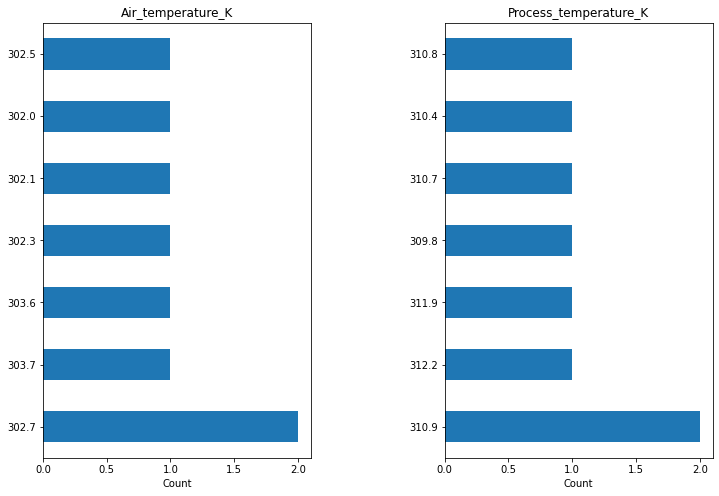

In [17]:
#Plot the distribution
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(12, 8))

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_Type_H_HDF.Air_temperature_K.value_counts().plot(kind='barh', ax=ax[0])

#Title
ax[0].set_title('Air_temperature_K')

#Axis Lable
ax[0].set_xlabel('Count')

df_Type_H_HDF.Process_temperature_K	.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Process_temperature_K')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);



In [18]:
#Average Values

Type_H_means = df_Type_H.groupby(by = 'Failure_Type')[['Air_temperature_K','Process_temperature_K','Rotational_speed_rpm','Torque_Nm','Tool_wear_min']].mean()
Type_H_means

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min
Failure_Type,,,,,
HDF,302.700000,310.950000,1322.375000,55.137500,87.75000
No,299.834423,309.914402,1540.232891,39.601124,106.78141
OSF,302.800000,312.400000,1411.000000,53.800000,246.00000
PWF,300.375000,310.150000,1636.000000,54.125000,125.25000
RNF,300.825000,310.650000,1505.750000,41.275000,55.25000
TWF,299.928571,309.442857,1473.857143,44.542857,219.00000


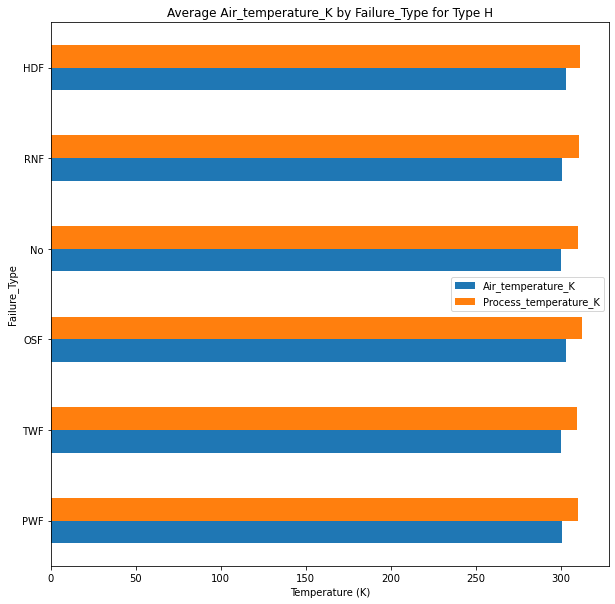

In [19]:
#Reorder in bar graph
(Type_H_means[['Air_temperature_K','Process_temperature_K']].reindex(index=Type_H_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Air_temperature_K by Failure_Type for Type H'))
plt.xlabel('Temperature (K)');


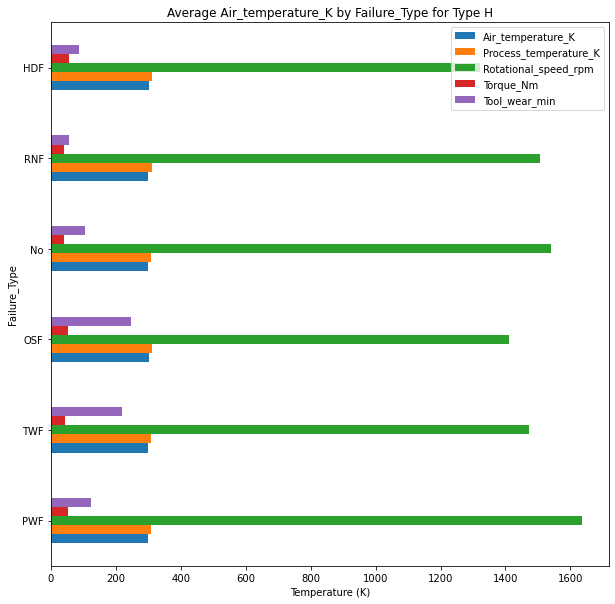

In [20]:
#Reorder in bar graph
(Type_H_means.reindex(index=Type_H_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Air_temperature_K by Failure_Type for Type H'))
plt.xlabel('Temperature (K)');

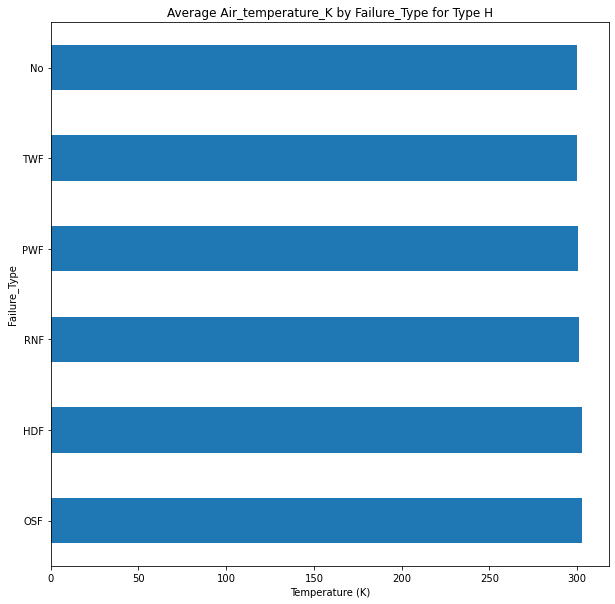

In [21]:
#Reorder in bar graph
(Type_H_means['Air_temperature_K'].reindex(index=Type_H_means[['Air_temperature_K']].mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Air_temperature_K by Failure_Type for Type H'))
plt.xlabel('Temperature (K)');


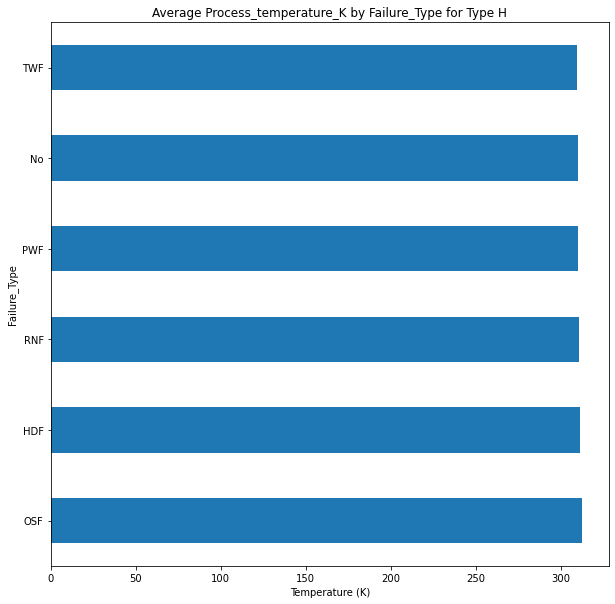

In [22]:
#Reorder in bar graph
(Type_H_means['Process_temperature_K'].reindex(index=Type_H_means[['Process_temperature_K']].mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Process_temperature_K by Failure_Type for Type H'))
plt.xlabel('Temperature (K)');


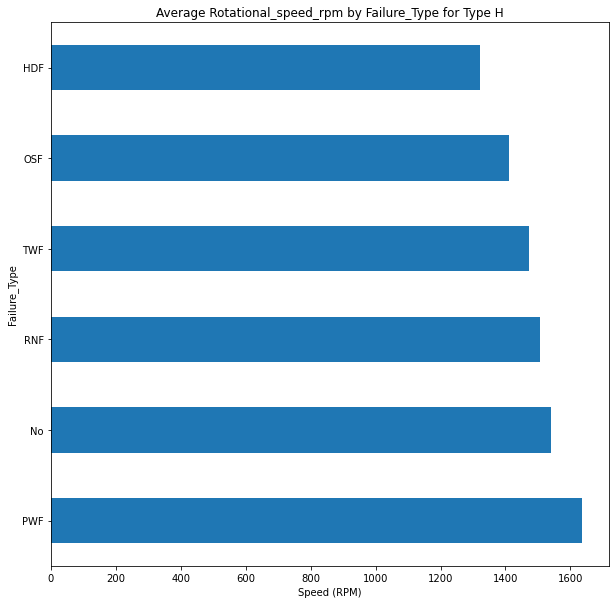

In [23]:
#Reorder in bar graph
(Type_H_means['Rotational_speed_rpm'].reindex(index=Type_H_means[['Rotational_speed_rpm']].mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Rotational_speed_rpm by Failure_Type for Type H'))
plt.xlabel('Speed (RPM)');


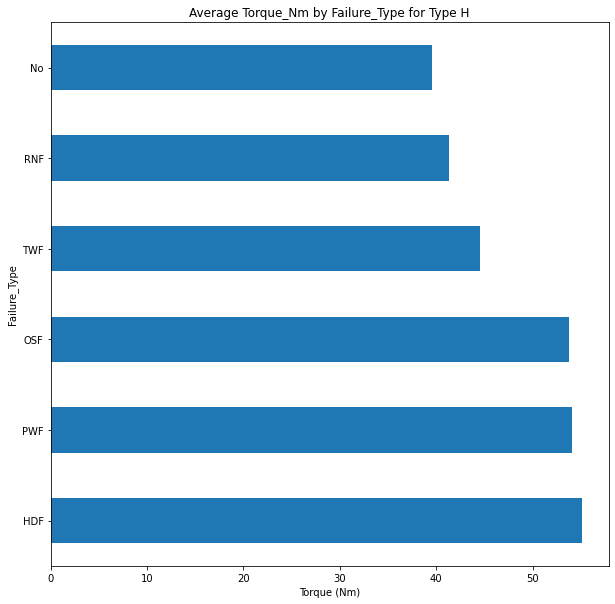

In [24]:
#Reorder in bar graph
(Type_H_means['Torque_Nm'].reindex(index=Type_H_means[['Torque_Nm']].mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Torque_Nm by Failure_Type for Type H'))
plt.xlabel('Torque (Nm)');

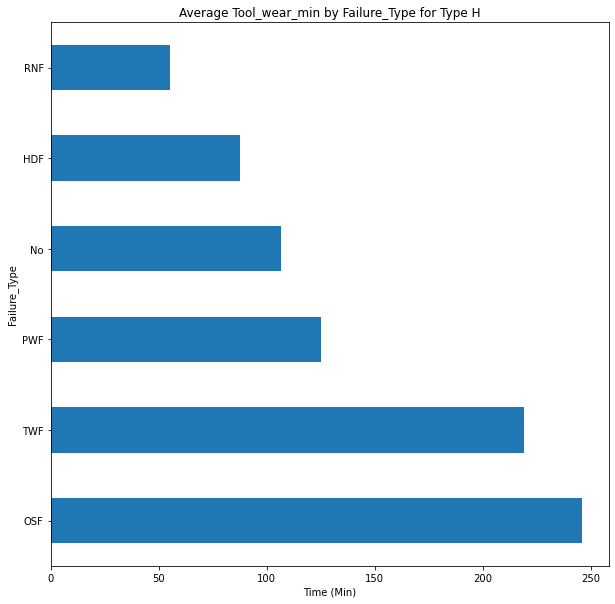

In [25]:
#Reorder in bar graph
(Type_H_means['Tool_wear_min'].reindex(index=Type_H_means[['Tool_wear_min']].mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Tool_wear_min by Failure_Type for Type H'))
plt.xlabel('Time (Min)');

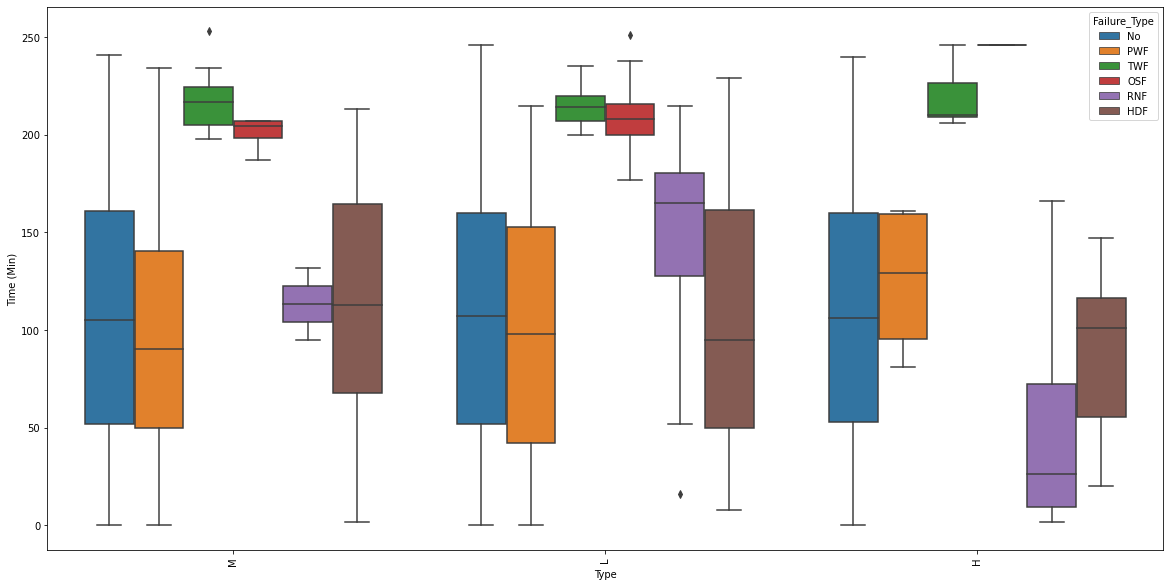

In [26]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter

plt.subplots(figsize=(20, 10))
sns.boxplot(x='Type', y='Tool_wear_min', hue='Failure_Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Time (Min)')
plt.xlabel('Type');


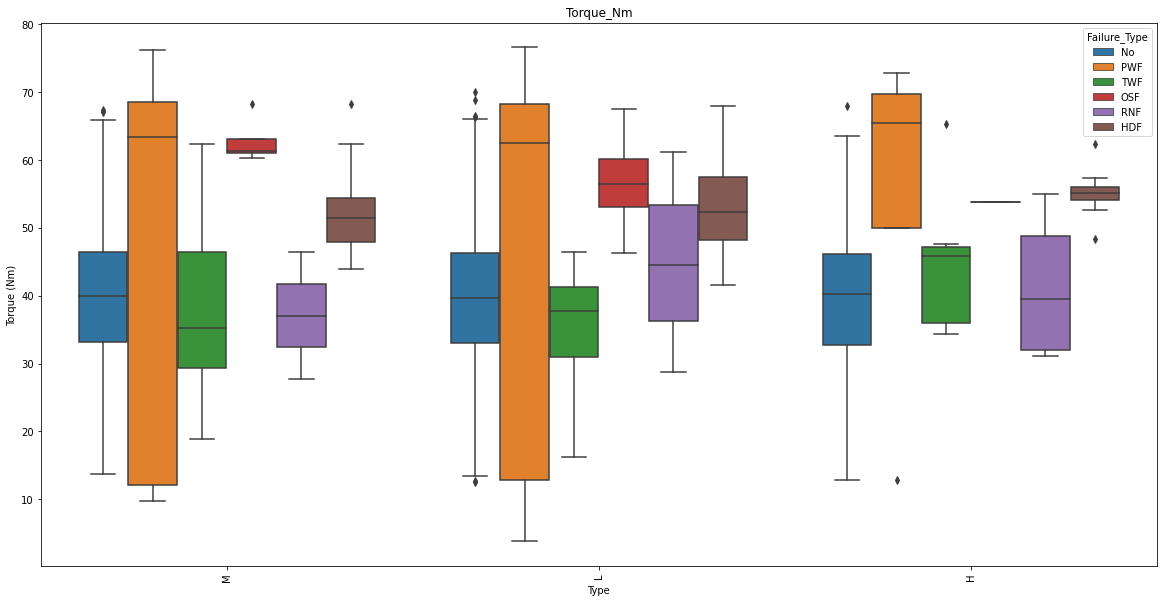

In [34]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter

plt.subplots(figsize=(20, 10))
sns.boxplot(x='Type', y='Torque_Nm', hue='Failure_Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Torque (Nm)')
plt.xlabel('Type')
plt.title('Torque_Nm');


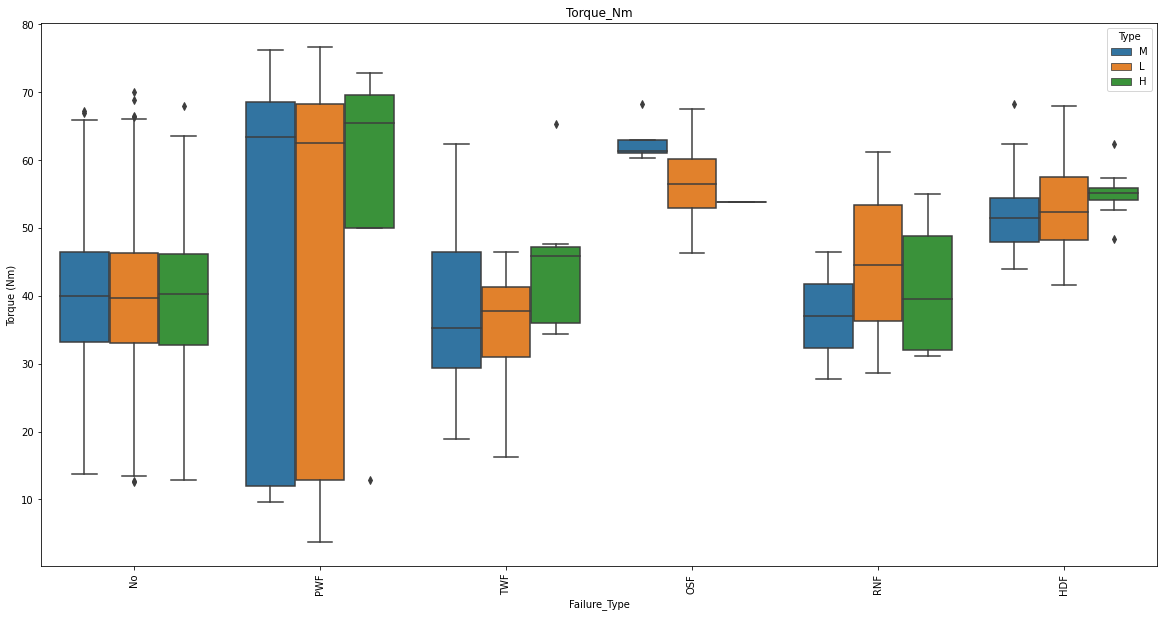

In [33]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter

plt.subplots(figsize=(20, 10))
sns.boxplot(x='Failure_Type', y='Torque_Nm', hue='Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Torque (Nm)')
plt.xlabel('Failure_Type')
plt.title('Torque_Nm');

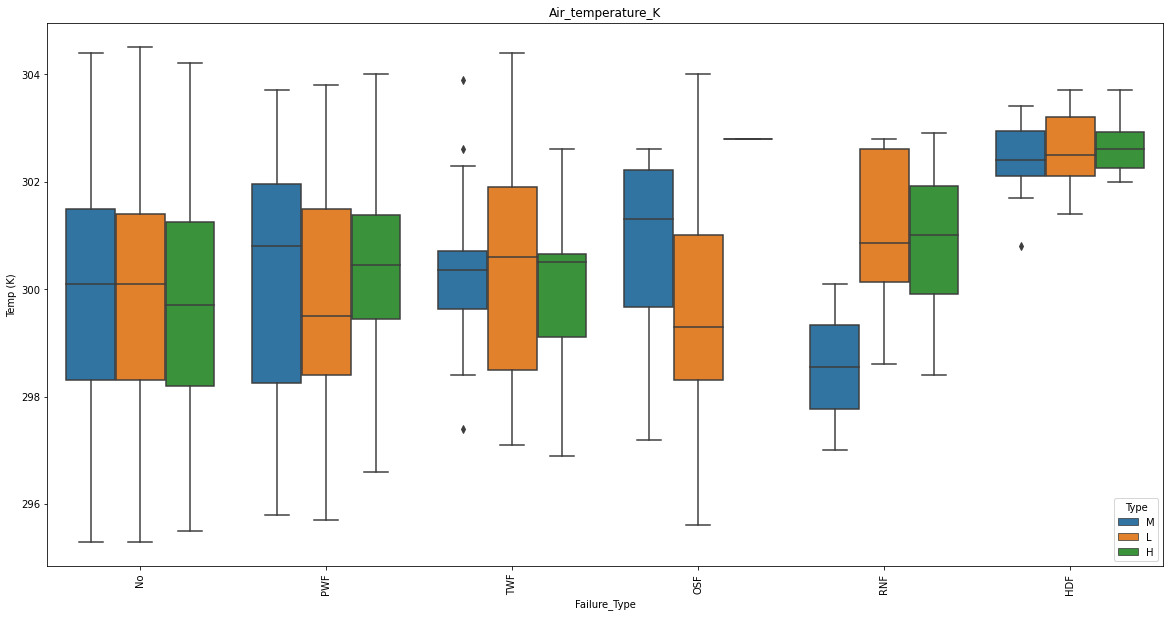

In [32]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter
# 'Air_temperature_K','Process_temperature_K','Rotational_speed_rpm','Torque_Nm','Tool_wear_min'


plt.subplots(figsize=(20, 10))
sns.boxplot(x='Failure_Type', y='Air_temperature_K', hue='Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Temp (K)')
plt.xlabel('Failure_Type')
plt.title('Air_temperature_K');

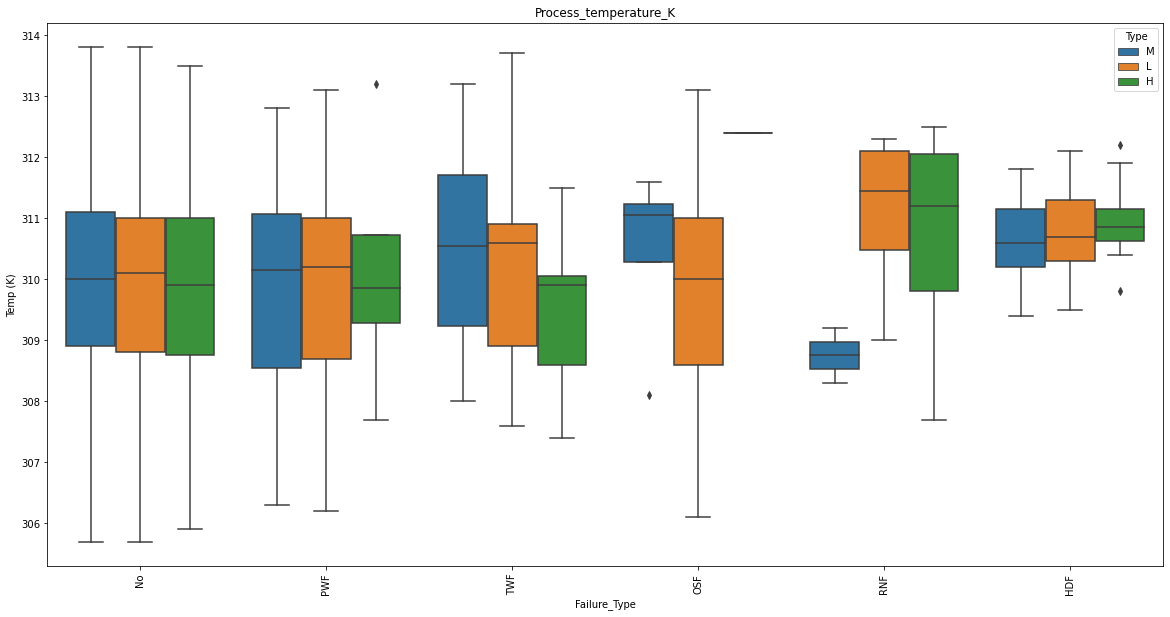

In [31]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter
# 'Air_temperature_K','Process_temperature_K','Rotational_speed_rpm','Torque_Nm','Tool_wear_min'


plt.subplots(figsize=(20, 10))
sns.boxplot(x='Failure_Type', y='Process_temperature_K', hue='Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Temp (K)')
plt.xlabel('Failure_Type')
plt.title('Process_temperature_K');

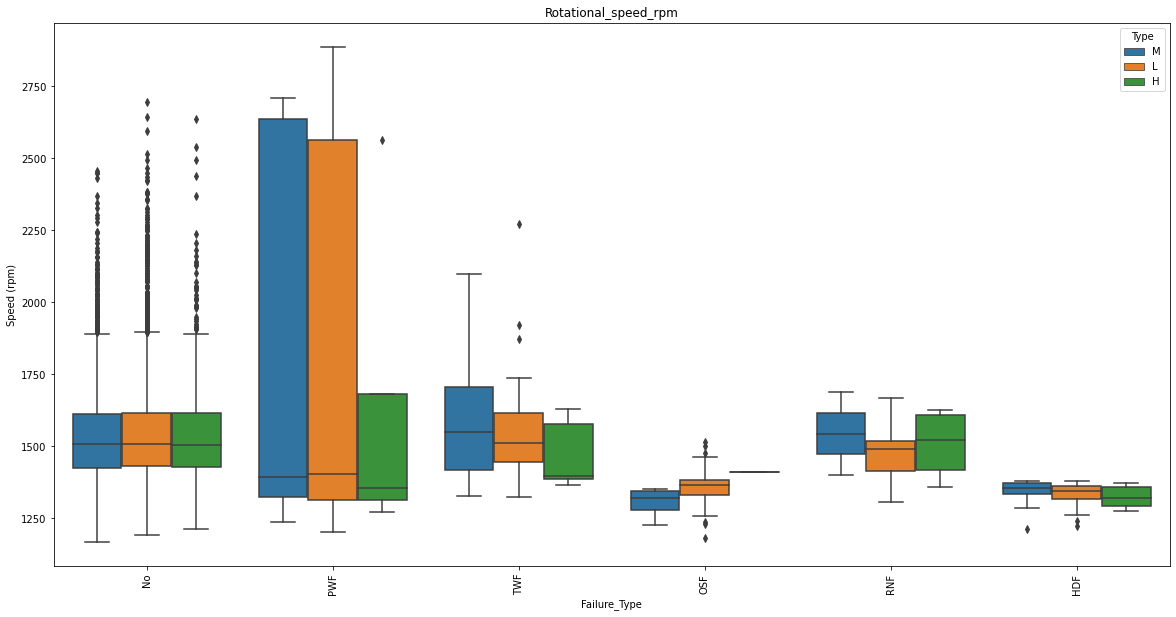

In [35]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter
# 'Air_temperature_K','Process_temperature_K','Rotational_speed_rpm','Torque_Nm','Tool_wear_min'


plt.subplots(figsize=(20, 10))
sns.boxplot(x='Failure_Type', y='Rotational_speed_rpm', hue='Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Speed (rpm)')
plt.xlabel('Failure_Type')
plt.title('Rotational_speed_rpm');

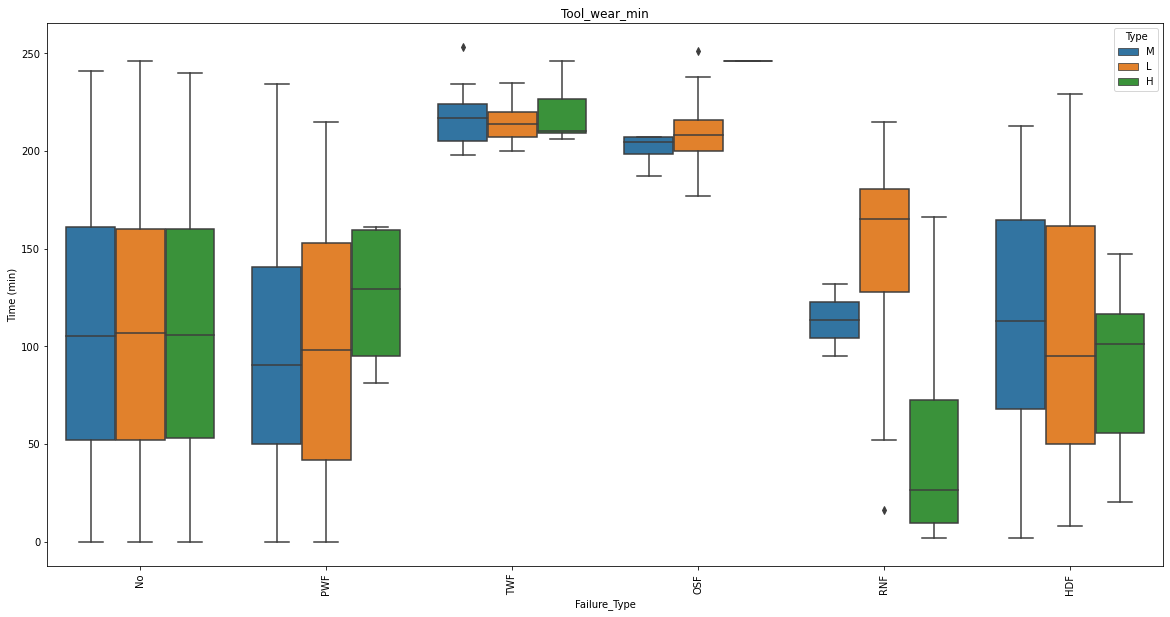

In [36]:
#Distribution of Parameters
# Col 1 : Type, Col 2 : Failure_Type , Col 3 : Parameter
# 'Air_temperature_K','Process_temperature_K','Rotational_speed_rpm','Torque_Nm','Tool_wear_min'


plt.subplots(figsize=(20, 10))
sns.boxplot(x='Failure_Type', y='Tool_wear_min', hue='Type', data=data2)
plt.xticks(rotation='vertical')
plt.ylabel('Time (min)')
plt.xlabel('Failure_Type')
plt.title('Tool_wear_min');